In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [6]:
from keras.layers import Dense,Embedding,SimpleRNN
from keras.models import Sequential
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.5850 - acc: 0.6777 - val_loss: 0.4195 - val_acc: 0.8250
Epoch 2/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.3572 - acc: 0.8562 - val_loss: 0.3793 - val_acc: 0.8352
Epoch 3/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.2622 - acc: 0.8985 - val_loss: 0.3340 - val_acc: 0.8620
Epoch 4/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.2072 - acc: 0.9220 - val_loss: 0.3276 - val_acc: 0.8694
Epoch 5/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.1355 - acc: 0.9524 - val_loss: 0.3895 - val_acc: 0.8438
Epoch 6/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.0857 - acc: 0.9720 - val_loss: 0.4266 - val_acc: 0.8438
Epoch 7/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.0548 - acc: 0.9837 - val_loss: 0.6012 - val_acc:

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


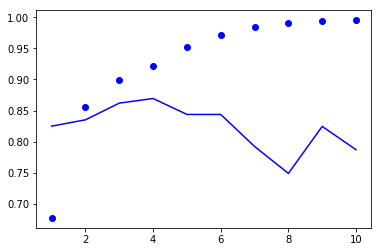

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.show()